In [17]:
'''Importing necessary libraries'''
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from plotly.offline import iplot 

'''Increase the default plot size and set the color scheme'''
plt.rcParams['figure.figsize'] = 8, 5
plt.style.use("fivethirtyeight")# for pretty graphs

# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

In [18]:
'''Reading Dataset using pandas'''
df = pd.read_csv('penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [19]:
'''Extracting info of dataset'''
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [20]:
'''Knowing size of dataset'''
print(df.shape)

(344, 7)


In [21]:
'''Describe function describe all the property of dataset like mean , standard deviation, count etc.'''
df.describe(include='all')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,334
unique,3,3,NaN,NaN,NaN,NaN,3
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


In [22]:
'''Covariance indicates the direction of the linear relationship between variables.'''
df.cov()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,29.807054,-2.534234,50.375765,2605.591912
culmen_depth_mm,-2.534234,3.899808,-16.212950,-747.370093
flipper_length_mm,50.375765,-16.212950,197.731792,9824.416062
body_mass_g,2605.591912,-747.370093,9824.416062,643131.077327


In [23]:
'''Correlation is measures both the strength and direction of the linear relationship between two variables.'''
df.corr()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.235053,0.656181,0.595110
culmen_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


In [24]:
'''Finding out missing Values in dataset.'''
# Total missing values
mis_val = df.isnull().sum()

# Percentage of missing values
mis_val_percent = 100 * df.isnull().sum() / len(df)

# Creating tabel of the result
mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
mis_val_table_ren_columns = mis_val_table.rename(
columns = {0 : 'Missing Values', 1 : '% of Total Values'})

# Sort the table by percentage of missing descending
mis_val_table_ren_columns = mis_val_table_ren_columns[
    mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
'% of Total Values', ascending=False).round(1)

mis_val_table_ren_columns

,Missing Values,% of Total Values
sex,10,2.9
culmen_length_mm,2,0.6
culmen_depth_mm,2,0.6
flipper_length_mm,2,0.6
body_mass_g,2,0.6


In [25]:
'''Handling missing values using sklearn'''

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent') # strategy can also be mean or median 
df.iloc[:,:] = imputer.fit_transform(df)

In [26]:
df.isnull().sum()
'''Since we had replaced missing value with most frequent values the following coloumns shows 0 as missing values.'''

'Since we had replaced missing value with most frequent values the following coloumns shows 0 as missing values.'

In [27]:
'''Converting Categorial feture to numerical using label encoder'''
lb = LabelEncoder()
df["sex"] = lb.fit_transform(df["sex"])
df['sex'][:5]

0    2
1    1
2    1
3    2
4    1
Name: sex, dtype: int32

In [28]:
df['species'].value_counts()
'''Unlike, Iris dataset which has equal number of all the species of flowers(50 each), 
   the penguins dataset has different number of samples for each species.'''

'Unlike, Iris dataset which has equal number of all the species of flowers(50 each), \n   the penguins dataset has different number of samples for each species.'

## Visualizing the data using various plots

<AxesSubplot:>

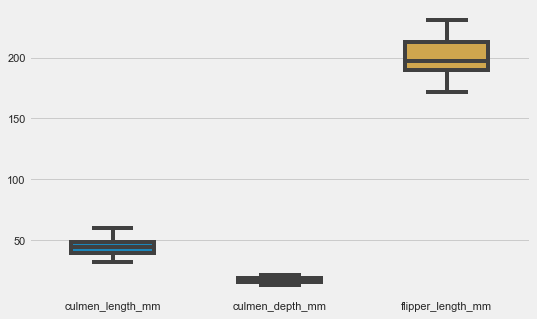

In [29]:
'''Box Plot'''
df1 = df[['culmen_length_mm', 'culmen_depth_mm','flipper_length_mm']]
sns.boxplot(data=df1, width=0.5,fliersize=5)

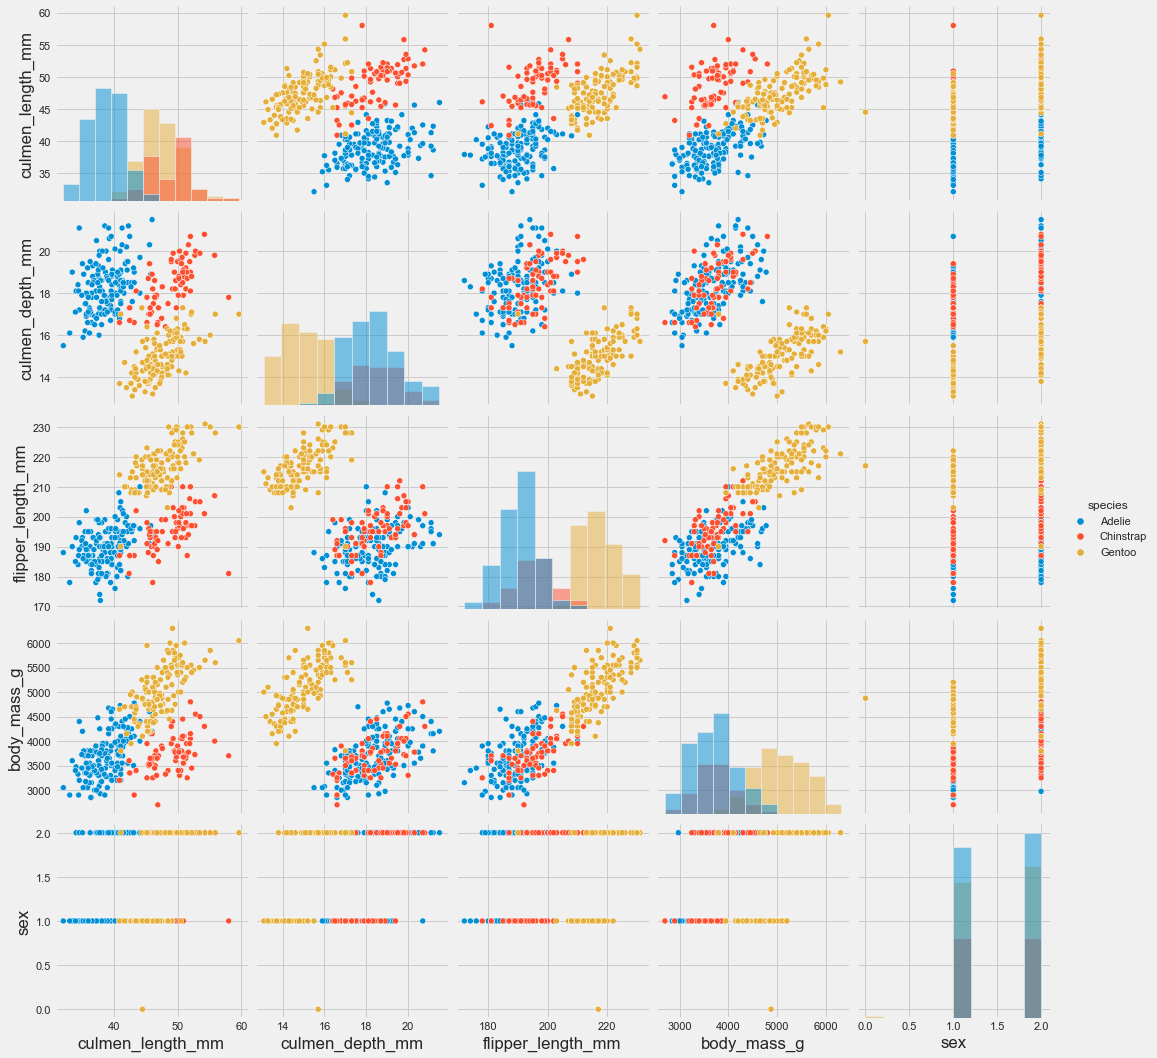

In [30]:
sns.pairplot(df, hue="species", size=3,diag_kind="hist")

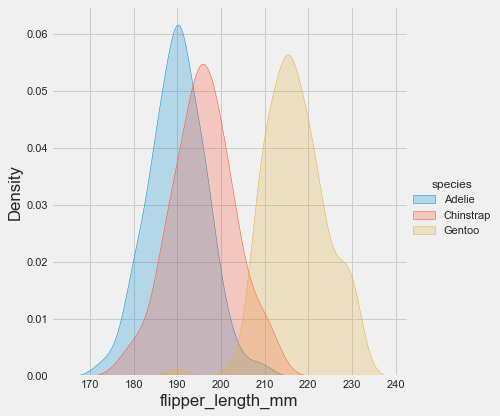

In [31]:
sns.FacetGrid(df, hue="species", size=6,) \
   .map(sns.kdeplot, "flipper_length_mm",shade=True) \
   .add_legend()